What is linear regression?
-----

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png" height="500"/></center>

In statistics, ** linear regression ** is an approach for modeling the relationship between a response variable  $y$ and one or more explanatory variables.



* ** Simple linear regresssion **: only one explanatory variable

* ** Multiple linear regression **: more than one explanatory variable

## Let's start with an example

Suppose we want to predict the fuel efficiency of a car (mpg) using its weight.

We will use the data set `cars` from yesterday which contains variables `mpg` and `weight`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline

In [5]:
cars = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv")
cars = cars.rename(columns={'Unnamed: 0':'car_model',
                           'wt':"weight"});
cars.head(n=2)

,car_model,mpg,cyl,disp,hp,drat,weight,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


## Linear Regression

We want to model the relationship between `mpg` and `weight` with a straight line.

First, let's do some EDA..

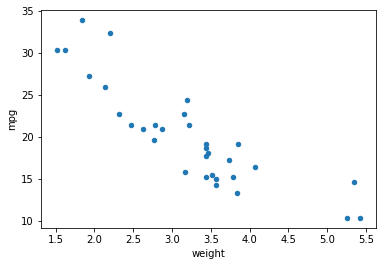

In [6]:
# Plot the variables of interest first
cars.plot(x='weight', 
          y='mpg', 
          kind='scatter');

What is your guess for intercept and slope?

What is Linear regression?
----

Linear regression is just the fancy term for finding the line of best fit. 

* In other words, we are looking for the slope and intercept that defines a line that fits the data as well as possible

* 'As well as possible' often means that we are trying to minimize the sum of squared residuals

In [8]:
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    X = [[p1[0], 1], [p2[0], 1]]
    y = [[p1[1]], [p2[1]]]
    soln = np.linalg.solve(X,y)
    return  soln[0][0], soln[1][0]

# Solve 
slope, intercept = get_line_equation(p1=[1000,45], p2=[5500, 0]) # Start with a initial guess
print('intercept: ', intercept)
print('slope: ', slope)

intercept:  55.00000000000001
slope:  -0.010000000000000002


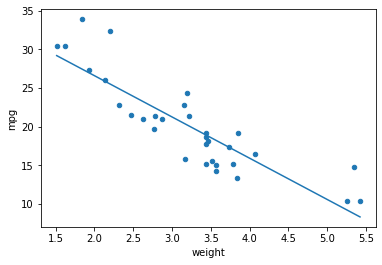

In [10]:
fig = cars.plot(x='weight', 
                y='mpg', 
                kind='scatter')
plt.plot(np.unique(cars.weight), np.poly1d(np.polyfit(cars.weight, cars.mpg, 1))(np.unique(cars.weight)));

Linear Regression: Formally Define 
------

Simple linear regression:

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$  
$$\text{for i = } 1, \dots, n$$

Regression terms
-----

$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$, where $\hat{\beta}_0$ and $\hat{\beta}_1$ are the estimated intercept and slope of the line

$\hat{y}$ are the points that fall on the fitted straight line 

Data is modeled as Fit + Residual
-----

$$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$  
$$\text{for i = } 1, \dots, n$$

A ** residual ** is the difference between an observed value and the fitted value provided by a model, $e_i = y_i - \hat{y}_i$

<center><img src="http://68.media.tumblr.com/7efec0c9403dd3b9eeb181e1681cd3d2/tumblr_inline_nii9j9oqS61rs8rb9.gif" height="500"/></center>

What is the biggest assumption of LINEAR Regression?
-----

<center><img src="images/linear-nonlinear-relationships.png" height="500"/></center>

Model assumption: y and x are linearly related

Ordinary Least Squares (OLS): Don't discount that is called "ordinary"
------

The simplest and most common way to estimate the intercept and the slope

It estimates by minimizing the sum of squared residuals:$\sum_{i=1}^n e_i^2$

[visual explanation](http://setosa.io/ev/ordinary-least-squares-regression/)

Simple linear regression
-----

$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$

$\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$, or

$\hat{\beta}_1 = r_{xy} \frac{s_y}{s_x}$, where $r_{xy}$ is the correlation between $x$ and $y$, $s_x$ and $s_y$ are the standard deviations of $x$ and $y$

In [11]:
import statsmodels.api as sms

In [12]:
# Choose the predictor and add a constant term
# (allow for an intercept)
X = cars[['weight']]
X = sms.add_constant(X)
X.head()

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,weight
0,1.0,2.620
1,1.0,2.875
2,1.0,2.320
3,1.0,3.215
4,1.0,3.440


In [13]:
y = cars.mpg
y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [15]:
# Create an OLS model
model = sms.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.29e-10
Time:                        10:29:50   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
weight        -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* You can find the R-Squared, which is 0.95 i.e. very highly related
* You can also look at the coefficients of the model for intercept and slope (next to "height")
* Kurtosis and Skew values are shown here
* A lot of significance testing is being done here


**Here is a brief description of these measures:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit 

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

Second Table: Coefficient Reports 

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

Third Table: Residuals, Autocorrelation, and Multicollinearity 

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: It provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).

The interpretation of some of these measures will be explained in the next lessons. For others.


## Model Interpretation

**Intercept** - The mean value for $y$ when $x=0$

**slope** - For each unit increase in $x$, the expected increase/decrease in $y$ (in the case of multiple linear regression, we need to add "holding all other explanatory variables constant", since there are more than one exaplanatory variable in the model.)

$\textbf{R}^2$ - Proportion of the variation in $y$ that is explained by the model. Measured on a scale from 0 (bad) to 1 (good)

$R^2$
----

Some definitions:
* Total sum of squares (** SST **): $\sum_{i=1}^n (y_i - \bar{y})^2$


* Regression sum of squares (** SSR **): $\sum_{i=1}^n (\hat{y}_i - \bar{y})^2$


* Residual sum of squares (** SSE **): $\sum_{i=1}^n e_i^2$  



SST = SSR + SSE


$R^2 = \frac{SSR}{SST}$


In [16]:
import seaborn as sns

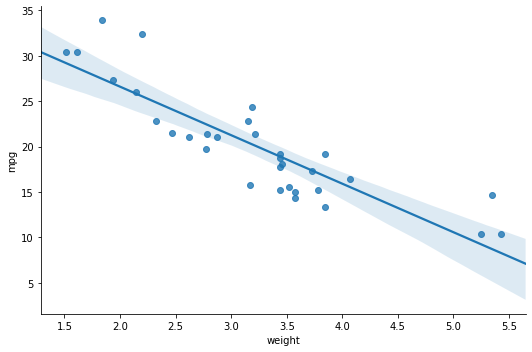

In [17]:
sns.lmplot('weight', 'mpg', data=cars, aspect=1.5);

Multiple linear regression
-----

$$y_i = \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \varepsilon_i$$
or  
$$y = X \beta + \varepsilon$$

$$y = X \beta + \varepsilon$$

$y = \begin{bmatrix} y_1 \\y_2 \\ \vdots \\ y_n \end{bmatrix}$, 
    $X = \begin{bmatrix} 1 & x_{11} & \dots & x_{1p} \\ 1 & x_{21} & \dots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \dots & x_{np} \end{bmatrix}$, 
    $\beta = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{bmatrix}$, 
    $\varepsilon = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{bmatrix}$  

$n$: sample size  
$p$: number of explanatory variables / predictors  

Data is modeled as Fit + Residual

Normal Equation
-----

$$ \hat{\beta} = (X^TX)^{-1}X^Ty $$

This is such an important equation it is called the _Normal Equation_

Summary
------
GOOD RESOURCE: https://realpython.com/linear-regression-in-python/
- Linear regression is finding the best fit line to data
- By data, we mean continuous variables
- Simple linear regression is 1 outcome and 1 explanatory variable
- Ordinary Least Squares (OLS) is the fitting algorithm, a closed-form solution
- $\textbf{R}^2$ is the proportion of the variation explained by the model

<br>
<br> 
<br>

----

-----
Bonus Materials
-----

* No matter how statistically significant the regression result is, it ** cannot prove causality **

37.28512616734204 -5.344471572722676


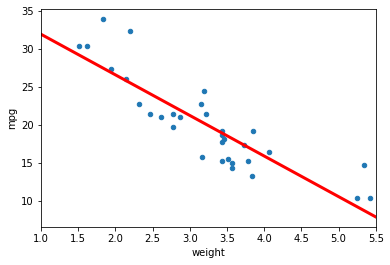

In [26]:
# TODO:Fix figure
# Plot the line along with the data
intercept, slope = results.params
ax = cars.plot('weight', 'mpg', kind='scatter')
xx = np.linspace(1., 5.5, 100)
print(intercept, slope)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1.,5.5]);